# Top 20 Correlation Heatmap for Wins

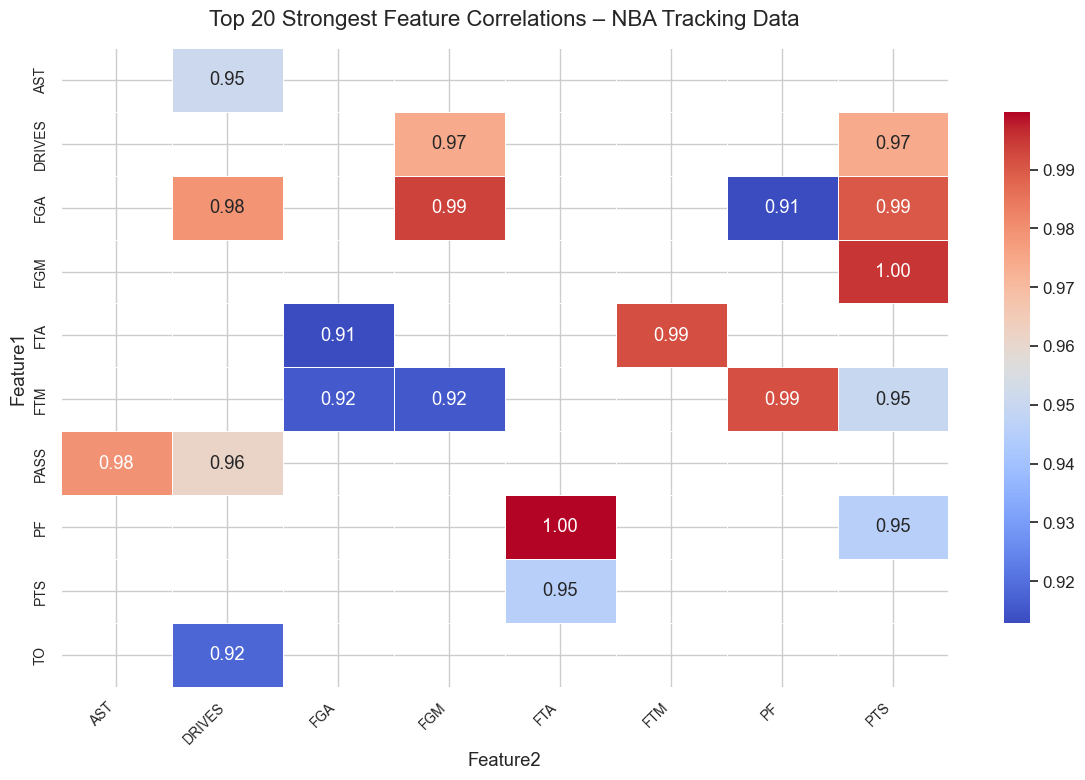

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df_wins = pd.read_csv("../data/NBATrackingDataWins24-25_clean.csv")

corr = df_wins.corr(numeric_only=True)

# Unstack and remove self-correlations
corr_pairs = (
    corr.unstack()
    .sort_values(key=lambda x: abs(x), ascending=False)
    .drop_duplicates()
)
corr_pairs = corr_pairs[corr_pairs < 1]  # remove perfect self-correlation

# Select the top N strongest correlations
N = 20
top_corr = corr_pairs.head(N)

# Convert to DataFrame
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ["Feature1", "Feature2", "Correlation"]

# Pivot for heatmap
pivot_df = top_corr_df.pivot(index="Feature1", columns="Feature2", values="Correlation")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)
plt.title(f"Top {N} Strongest Feature Correlations – NBA Tracking Data", fontsize=16, pad=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Top 20 Correlation Heat Map for Losses 

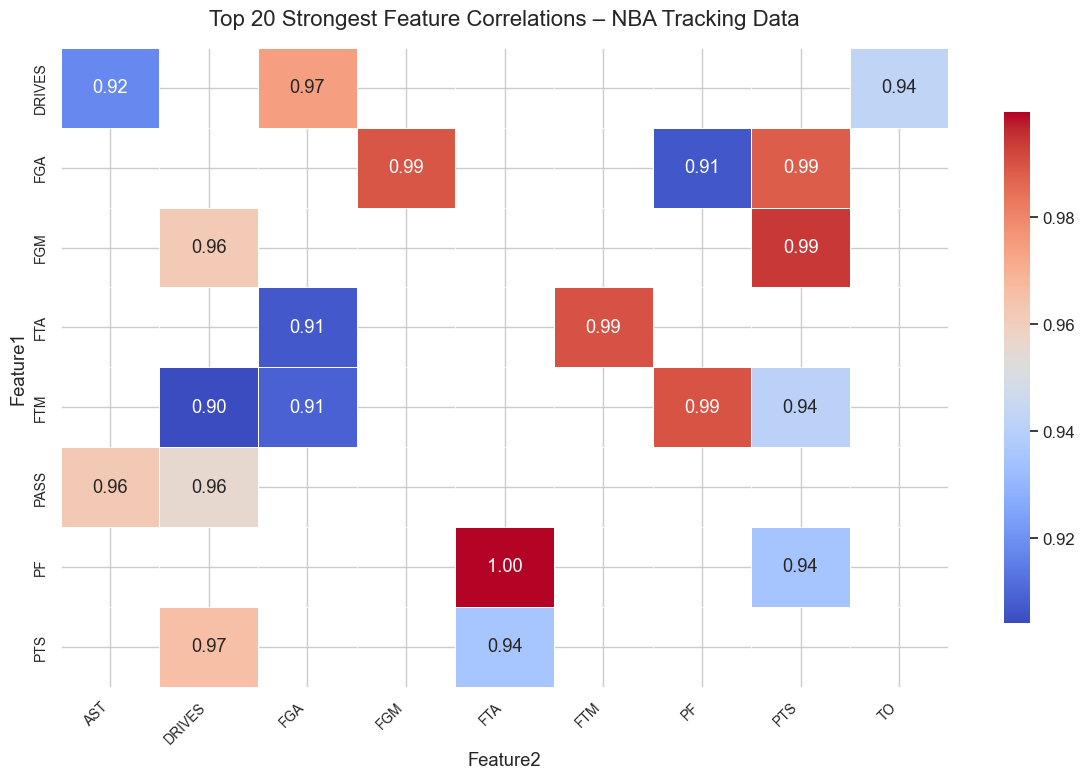

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

df_losses = pd.read_csv("../data/NBATrackingDataLosses24-25_clean.csv")

corr = df_losses.corr(numeric_only=True)

# Unstack and remove self-correlations
corr_pairs = (
    corr.unstack()
    .sort_values(key=lambda x: abs(x), ascending=False)
    .drop_duplicates()
)
corr_pairs = corr_pairs[corr_pairs < 1]  # remove perfect self-correlation

# Select the top N strongest correlations
N = 20
top_corr = corr_pairs.head(N)

# Convert to DataFrame
top_corr_df = top_corr.reset_index()
top_corr_df.columns = ["Feature1", "Feature2", "Correlation"]

# Pivot for heatmap
pivot_df = top_corr_df.pivot(index="Feature1", columns="Feature2", values="Correlation")

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5
)
plt.title(f"Top {N} Strongest Feature Correlations – NBA Tracking Data", fontsize=16, pad=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
df_wins = pd.read_csv("../data/NBATrackingDataWins24-25_clean.csv")
df_losses = pd.read_csv("../data/NBATrackingDataLosses24-25_clean.csv")

# Function to get top N correlations
def get_top_correlations(df, n=20):
    corr = df.corr(numeric_only=True)
    corr_pairs = corr.unstack().drop_duplicates()
    corr_pairs = corr_pairs[corr_pairs < 1]  # remove self-correlations
    top_corr = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index).head(n)
    top_corr.index = [f"{a} & {b}" for a, b in top_corr.index]  # format pairs nicely
    return top_corr

# Get top correlations for each
top_wins = get_top_correlations(df_wins)
top_losses = get_top_correlations(df_losses)

comparison_df = pd.concat([top_wins, top_losses], axis=1)
comparison_df.columns = ["Wins Correlation", "Losses Correlation"]

comparison_df = comparison_df.round(2)
comparison_df

,Wins Correlation,Losses Correlation
FTA & PF,1.00,1.00
FGM & PTS,1.00,0.99
FGM & FGA,0.99,0.99
FTM & FTA,0.99,0.99
FTM & PF,0.99,0.99
FGA & PTS,0.99,0.99
PASS & AST,0.98,0.96
DRIVES & FGA,0.98,0.97
DRIVES & FGM,0.97,0.96
DRIVES & PTS,0.97,0.97
